In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
RANDOM_SEED = 486
tqdm.pandas()

In [2]:
objects = (pd.read_excel('11_Многоквартирные дома с технико-экономическими характеристиками.xlsx', sheet_name='Sheet1', skiprows=1)
             .drop(['ID', 'PARENT_ID', 'LOGIN', 'Форма собственности', 'Год реконструкции',
                    'Строительный объем', 'Износ объекта (по БТИ)', 'Класс энергоэффективности',
                    'Вид социального объекта', 'Причина Изменения Статуса МКД', 'Категория МКД', 'Кол-во обращений'],axis=1))

In [394]:
objects.columns

Index(['Адрес', 'Нет техпаспорта МосгорБТИ', 'Год постройки', 'Серия проекта',
       'Количество этажей', 'Количество подъездов', 'Количество квартир',
       'Общая площадь', 'Общая площадь жилых помещений',
       'Общая площадь нежилых помещений', 'Материал стен',
       'Признак аварийности здания', 'Количество пассажирских лифтов',
       'Количество грузопассажирских лифтов', 'Очередность уборки кровли',
       'Материал кровли', 'Тип жилищного фонда', 'Статус МКД',
       'Статус управления МКД', 'Количество грузовых лифтов', 'inc_count'],
      dtype='object')

In [3]:
objects.set_index('UNOM', inplace=True)

In [4]:
objects.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18432 entries, 49928 to 5259331
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Адрес                                18432 non-null  object 
 1   Нет техпаспорта МосгорБТИ            4155 non-null   object 
 2   Год постройки                        18374 non-null  float64
 3   Серия проекта                        18373 non-null  float64
 4   Количество этажей                    18374 non-null  float64
 5   Количество подъездов                 18353 non-null  float64
 6   Количество квартир                   5617 non-null   float64
 7   Общая площадь                        18373 non-null  float64
 8   Общая площадь жилых помещений        18355 non-null  float64
 9   Общая площадь нежилых помещений      18355 non-null  float64
 10  Материал стен                        18373 non-null  float64
 11  Признак аварийности зд

In [5]:
objects.describe()

,Год постройки,Серия проекта,Количество этажей,Количество подъездов,Количество квартир,Общая площадь,Общая площадь жилых помещений,Общая площадь нежилых помещений,Материал стен,Признак аварийности здания,Количество пассажирских лифтов,Количество грузопассажирских лифтов,Очередность уборки кровли,Материал кровли,Тип жилищного фонда,Статус МКД,Статус управления МКД,Количество грузовых лифтов
count,18374.000000,1.837300e+04,18374.000000,18353.000000,5617.000000,18373.000000,18355.000000,18355.000000,1.837300e+04,5.673000e+03,18358.000000,18358.000000,2.128000e+03,5.599000e+03,5.847000e+03,1.843200e+04,4.583000e+03,18353.000000
mean,1789.304071,2.971383e+06,3.422989,0.997657,90.462524,2624.641376,1433.983656,1193.231599,3.477223e+07,2.272849e+07,0.576316,0.156934,2.228916e+07,2.228920e+07,3.899116e+07,6.536049e+07,4.526172e+07,0.036070
std,565.225663,7.192604e+06,4.055838,1.868189,92.932663,5733.588586,3727.140341,4057.805842,6.902726e+07,1.155607e-01,1.726752,0.818791,4.945727e-01,1.945749e+00,7.819484e+06,4.866334e+06,5.997579e+06,0.315962
min,0.000000,2.048744e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.048928e+06,2.272849e+07,0.000000,0.000000,2.228916e+07,2.228920e+07,2.274196e+07,4.132187e+07,4.505821e+07,0.000000
25%,1952.000000,2.048798e+06,1.000000,0.000000,30.000000,99.000000,0.000000,23.000000,2.048928e+06,2.272849e+07,0.000000,0.000000,2.228916e+07,2.228920e+07,4.287564e+07,5.876133e+07,4.506358e+07,0.000000
50%,1966.000000,2.048798e+06,1.000000,0.000000,75.000000,544.000000,0.000000,174.000000,2.048929e+06,2.272849e+07,0.000000,0.000000,2.228916e+07,2.228920e+07,4.287564e+07,6.848145e+07,4.506358e+07,0.000000
75%,1981.000000,2.048912e+06,5.000000,1.000000,116.000000,3503.000000,352.500000,866.500000,2.048935e+06,2.272849e+07,0.000000,0.000000,2.228916e+07,2.228920e+07,4.287564e+07,6.848145e+07,4.506358e+07,0.000000
max,2020.000000,1.797739e+08,37.000000,15.000000,1845.000000,202137.000000,135157.000000,164299.000000,2.619089e+08,2.272849e+07,33.000000,20.000000,2.228916e+07,2.228921e+07,4.287564e+07,6.872659e+07,2.267220e+08,12.000000


In [6]:
objects['Нет техпаспорта МосгорБТИ'].replace('.ет.*БТИ', 'Нет техпаспорта МосгорБТИ', regex=True, inplace=True)
objects['Нет техпаспорта МосгорБТИ'].fillna(False, inplace=True)

In [7]:
objects['Год постройки'].replace(0, np.nan, inplace=True)

In [8]:
objects['Серия проекта'].fillna(2048743, inplace=True)

In [9]:
objects['Количество этажей'].replace(0, np.nan, inplace=True)

In [10]:
objects['Количество подъездов'].replace(0, np.nan, inplace=True)

In [11]:
# objects['Количество квартир'].replace(0, np.nan, inplace=True)

In [12]:
objects['Общая площадь'].replace(0, np.nan, inplace=True)

In [13]:
# objects['Общая площадь жилых помещений'].replace(0, np.nan, inplace=True)

In [14]:
# objects['Общая площадь нежилых помещений'].replace(0, np.nan, inplace=True)

In [15]:
objects['Материал стен'].fillna(101812168, inplace=True)

In [16]:
objects['Признак аварийности здания'].fillna(22728487, inplace=True)

In [17]:
# objects['Количество пассажирских лифтов'].replace(0, np.nan, inplace=True)

In [18]:
# objects['Количество грузопассажирских лифтов'].replace(0, np.nan, inplace=True)

In [19]:
objects['Материал кровли'].fillna(22289209, inplace=True)

In [20]:
objects['Очередность уборки кровли'].fillna(0, inplace=True)

In [21]:
objects['Тип жилищного фонда'].value_counts(dropna=False)

NaN           12585
42875644.0     4674
22741963.0      994
30034032.0      124
22741962.0       55
Name: Тип жилищного фонда, dtype: int64

In [22]:
objects['Тип жилищного фонда'].fillna(0, inplace=True)

In [23]:
objects['Статус МКД'].value_counts(dropna=False)

68481453    12721
58761330     5583
41321872      120
68726587        4
68481451        3
68481454        1
Name: Статус МКД, dtype: int64

In [24]:
objects['Статус управления МКД'].fillna(0, inplace=True)

In [25]:
objects['Количество грузовых лифтов'].value_counts(dropna=False)

0.0     18009
1.0       158
2.0       117
NaN        79
3.0        42
4.0        11
5.0         7
6.0         5
8.0         2
12.0        1
7.0         1
Name: Количество грузовых лифтов, dtype: int64

In [26]:
objects['Статус управления МКД'].astype('int')

UNOM
49928             0
64148      45063584
19485      45063584
18533      45063584
22830      45063584
             ...   
6003997    45063584
5259334    45063584
5259335    45063584
5259332    45063584
5259331    45063584
Name: Статус управления МКД, Length: 18432, dtype: int32

In [27]:
objects = objects.astype({'Серия проекта': 'int',
                          'Материал стен': 'int',
                          'Признак аварийности здания': 'int',
                          'Очередность уборки кровли': 'int',
                          'Материал кровли': 'int',
                          'Тип жилищного фонда': 'int',
                          'Статус МКД': 'int',
                          'Статус управления МКД': 'int'})

In [28]:
objects = objects.astype({'Нет техпаспорта МосгорБТИ': bool,
                          'Серия проекта': 'category',
                          'Материал стен': 'category',
                          'Признак аварийности здания': 'category',
                          'Очередность уборки кровли': 'category',
                          'Материал кровли': 'category',
                          'Тип жилищного фонда': 'category',
                          'Статус МКД': 'category',
                          'Статус управления МКД': 'category'})

In [350]:
objects.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18432 entries, 49928 to 5259331
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   Адрес                                18432 non-null  object  
 1   Нет техпаспорта МосгорБТИ            18432 non-null  bool    
 2   Год постройки                        16710 non-null  float64 
 3   Серия проекта                        18432 non-null  category
 4   Количество этажей                    18240 non-null  float64 
 5   Количество подъездов                 5640 non-null   float64 
 6   Количество квартир                   5617 non-null   float64 
 7   Общая площадь                        17373 non-null  float64 
 8   Общая площадь жилых помещений        18355 non-null  float64 
 9   Общая площадь нежилых помещений      18355 non-null  float64 
 10  Материал стен                        18432 non-null  category
 11  Признак а

In [29]:
objects.describe()

,Год постройки,Количество этажей,Количество подъездов,Количество квартир,Общая площадь,Общая площадь жилых помещений,Общая площадь нежилых помещений,Количество пассажирских лифтов,Количество грузопассажирских лифтов,Количество грузовых лифтов
count,16710.000000,18240.000000,5640.000000,5617.000000,17373.000000,18355.000000,18355.000000,18358.000000,18358.000000,18353.000000
mean,1967.484919,3.448136,3.246454,90.462524,2775.717262,1433.983656,1193.231599,0.576316,0.156934,0.036070
std,26.589715,4.060044,2.014112,92.932663,5860.633728,3727.140341,4057.805842,1.726752,0.818791,0.315962
min,1600.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1958.000000,1.000000,2.000000,30.000000,129.000000,0.000000,23.000000,0.000000,0.000000,0.000000
50%,1968.000000,1.000000,3.000000,75.000000,715.000000,0.000000,174.000000,0.000000,0.000000,0.000000
75%,1984.000000,5.000000,4.000000,116.000000,3561.000000,352.500000,866.500000,0.000000,0.000000,0.000000
max,2020.000000,37.000000,15.000000,1845.000000,202137.000000,135157.000000,164299.000000,33.000000,20.000000,12.000000


In [30]:
objects.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18432 entries, 49928 to 5259331
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   Адрес                                18432 non-null  object  
 1   Нет техпаспорта МосгорБТИ            18432 non-null  bool    
 2   Год постройки                        16710 non-null  float64 
 3   Серия проекта                        18432 non-null  category
 4   Количество этажей                    18240 non-null  float64 
 5   Количество подъездов                 5640 non-null   float64 
 6   Количество квартир                   5617 non-null   float64 
 7   Общая площадь                        17373 non-null  float64 
 8   Общая площадь жилых помещений        18355 non-null  float64 
 9   Общая площадь нежилых помещений      18355 non-null  float64 
 10  Материал стен                        18432 non-null  category
 11  Признак а

In [31]:
objects

,Адрес,Нет техпаспорта МосгорБТИ,Год постройки,Серия проекта,Количество этажей,Количество подъездов,Количество квартир,Общая площадь,Общая площадь жилых помещений,Общая площадь нежилых помещений,Материал стен,Признак аварийности здания,Количество пассажирских лифтов,Количество грузопассажирских лифтов,Очередность уборки кровли,Материал кровли,Тип жилищного фонда,Статус МКД,Статус управления МКД,Количество грузовых лифтов
UNOM,,,,,,,,,,,,,,,,,,,,
49928,"Дом по адресу Красковская ул., д.121А",False,1956.0,2048798,1.0,2.0,1.0,76.0,76.0,0.0,179625102,22728486,0.0,0.0,0,22289204,22741963,58761330,0,0.0
64148,"Дом по адресу Байкальская ул., д.18, к.2",False,2005.0,2048798,18.0,2.0,148.0,8266.0,8220.0,46.0,179625111,22728486,2.0,2.0,0,22289201,42875644,58761330,45063584,0.0
19485,"Дом по адресу Перовская ул., д.48",False,1955.0,2048912,4.0,2.0,20.0,1240.0,1070.0,170.0,179625102,22728486,0.0,0.0,22289162,22289204,42875644,58761330,45063584,0.0
18533,"Дом по адресу Парковая 3-я ул., д.39, к.3",False,1960.0,2048912,5.0,3.0,60.0,2518.0,2492.0,26.0,179625102,22728486,0.0,0.0,22289162,22289201,42875644,58761330,45063584,0.0
22830,"Дом по адресу Свободный просп., д.11, к.2",False,1973.0,2048755,9.0,12.0,431.0,21103.0,21088.0,15.0,2048929,22728486,12.0,0.0,0,22289201,42875644,58761330,45063584,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6003997,"Дом по адресу Салтыковская ул., д.6/1, к.5",True,NaN,2048743,NaN,NaN,NaN,NaN,NaN,NaN,101812168,22728487,NaN,NaN,0,22289209,42875644,58761330,45063584,NaN
5259334,"Дом по адресу Амурская ул., д.2А, к.1",True,NaN,2048743,NaN,NaN,NaN,NaN,NaN,NaN,101812168,22728487,NaN,NaN,0,22289209,42875644,58761330,45063584,NaN
5259335,"Дом по адресу Амурская ул., д.2А, к.2",True,NaN,2048743,NaN,NaN,NaN,NaN,NaN,NaN,101812168,22728487,NaN,NaN,0,22289209,42875644,58761330,45063584,NaN


In [32]:
inc1 = pd.read_excel('2_new_Инциденты,_зарегистрированные_на_объектах_городского_хозяйства.xlsx', sheet_name='Result 1')
inc2 = pd.read_excel('2_new_Инциденты,_зарегистрированные_на_объектах_городского_хозяйства.xlsx', sheet_name='Result 2')

In [33]:
incidents = pd.concat([inc1, inc2], ignore_index=True)

In [34]:
objects = (objects.merge(incidents.groupby('unom')['unom'].count(), how='left', left_index=True, right_index=True)
                  .rename({'unom': 'inc_count'}, axis=1))

In [35]:
objects.inc_count.fillna(0, inplace=True)

<AxesSubplot:>

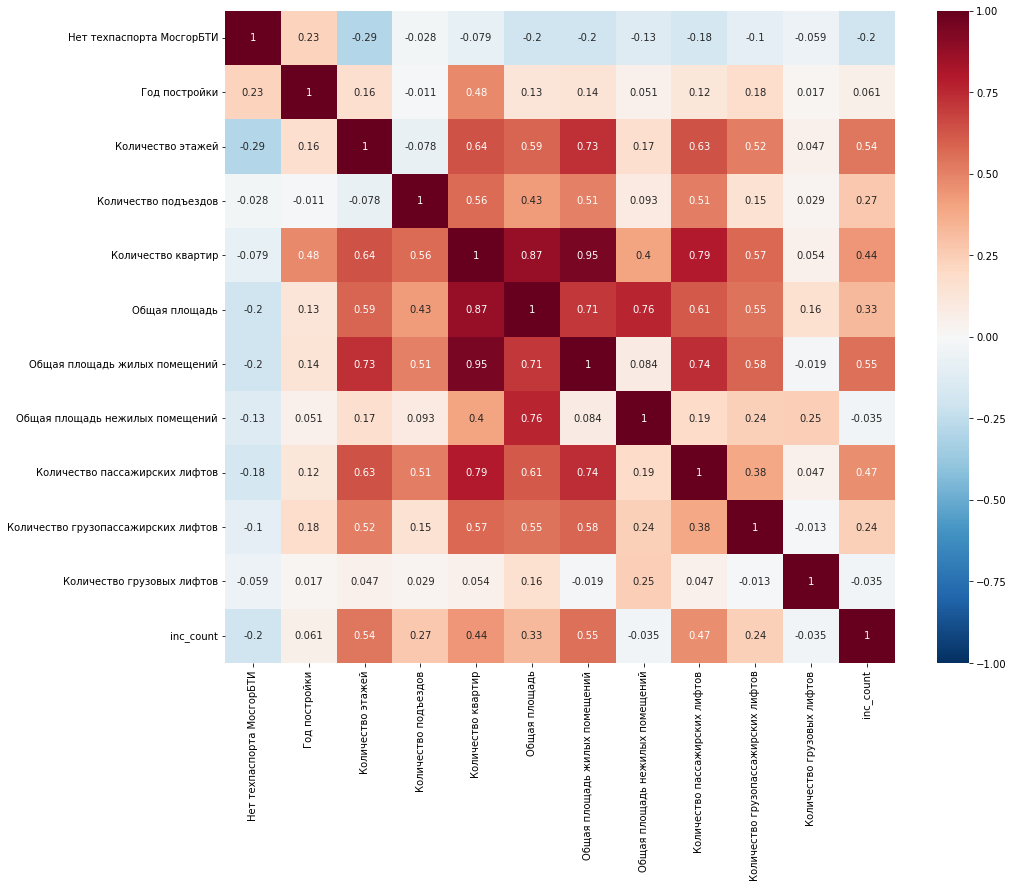

In [36]:
plt.figure(figsize=(15,12))
sns.heatmap(objects.corr(),
           cmap='RdBu_r',
           annot=True,
           vmin=-1, vmax=1)

In [391]:
text_col = list(objects.select_dtypes(include=['object']).columns)
num_col = list(objects.select_dtypes(include=['float64']).columns)[:-1]
cat_col = list(objects.select_dtypes(include=['category', 'bool']).columns)

In [38]:
# objects.inc_count.replace(1,0, inplace=True)

In [39]:
# pd.qcut(objects.inc_count, 50, precision=0, duplicates='drop').cat.codes.value_counts()

In [90]:
# objects_with_inc = objects.query('inc_count != 0')

In [336]:
# y = objects_with_inc.inc_count.values
# X = objects_with_inc.drop(['Адрес', 'inc_count'], axis=1)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [339]:
val = [29923,
14252,
17686,
260104,
8398,
49813,
50340,
11152,
21159,
8215,
19214]

In [387]:
objects_v = objects.drop(val)

In [388]:
y = objects_v.inc_count.values
X = objects_v.drop(['Адрес', 'inc_count'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [332]:
y = objects.inc_count.values
X = objects.drop(['Адрес', 'inc_count'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [389]:
from catboost import CatBoostRegressor, Pool
from catboost.utils import eval_metric
from sklearn import metrics

train_pool = Pool(X_train, y_train, cat_features=cat_col, text_features=None, embedding_features=None)
test_pool = Pool(X_test, y_test, cat_features=cat_col, text_features=None, embedding_features=None)
model = CatBoostRegressor(eval_metric='MAPE', learning_rate=0.1, iterations=2000)
model.fit(train_pool, eval_set=test_pool, use_best_model=True, early_stopping_rounds=5)

test_preds = model.predict(test_pool)
train_preds = model.predict(train_pool)

print("\nTest  MAPE : %.5f"%eval_metric(y_test, test_preds, "MAPE")[0])
print("Train MAPE : %.5f"%eval_metric(y_train, train_preds, "MAPE")[0])

0:	learn: 36.0028611	test: 36.2558356	best: 36.2558356 (0)	total: 26ms	remaining: 52s
1:	learn: 32.7754044	test: 33.0312666	best: 33.0312666 (1)	total: 47.4ms	remaining: 47.4s
2:	learn: 29.8407939	test: 30.0785264	best: 30.0785264 (2)	total: 73.9ms	remaining: 49.2s
3:	learn: 27.0270757	test: 27.2598153	best: 27.2598153 (3)	total: 97.7ms	remaining: 48.8s
4:	learn: 24.6246883	test: 24.8463039	best: 24.8463039 (4)	total: 117ms	remaining: 46.7s
5:	learn: 22.1799355	test: 22.3817951	best: 22.3817951 (5)	total: 137ms	remaining: 45.6s
6:	learn: 20.1281860	test: 20.3216817	best: 20.3216817 (6)	total: 162ms	remaining: 46.2s
7:	learn: 18.1337696	test: 18.3101501	best: 18.3101501 (7)	total: 183ms	remaining: 45.5s
8:	learn: 16.4528317	test: 16.6173475	best: 16.6173475 (8)	total: 209ms	remaining: 46.3s
9:	learn: 14.9518696	test: 15.1099623	best: 15.1099623 (9)	total: 239ms	remaining: 47.6s
10:	learn: 13.5515028	test: 13.7005065	best: 13.7005065 (10)	total: 264ms	remaining: 47.8s
11:	learn: 12.21008

In [414]:
model.save_model('model.cbm')

In [415]:
model2 = CatBoostClassifier()
model2.load_model('model.cbm')

In [ ]:
model2.predict(objects.drop(['Адрес', 'inc_count', 'inc_level'], axis=1).loc[val]).round()

In [409]:
val = objects['inc_count'].sample(10).index
val

Int64Index([2400902, 2105305, 2401894,   18679,   16570, 2503550, 2501105,
            2116277, 2404760, 2502971],
           dtype='int64', name='UNOM')

In [410]:
np.set_printoptions(suppress=True)

In [417]:
model.predict(objects.drop(['Адрес', 'inc_count'], axis=1).loc[val]).round()

array([  0.,   1.,  39., 143., 308.,   1.,   1.,  -1.,  -0.,   0.])

In [413]:
objects['inc_count'].loc[val]

UNOM
2400902      0.0
2105305      0.0
2401894      6.0
18679      149.0
16570      255.0
2503550      0.0
2501105      0.0
2116277      0.0
2404760      0.0
2502971      2.0
Name: inc_count, dtype: float64

<AxesSubplot:xlabel='inc_count', ylabel='Count'>

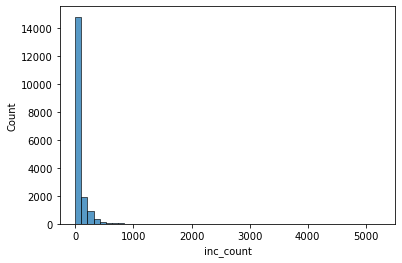

In [373]:
sns.histplot(objects['inc_count'], bins=50)

In [362]:
pd.qcut(objects['inc_count'], 10, retbins=True, duplicates='drop')

(UNOM
 49928        (-0.001, 2.0]
 64148      (199.0, 5237.0]
 19485         (2.0, 102.0]
 18533         (2.0, 102.0]
 22830      (199.0, 5237.0]
                 ...       
 6003997      (-0.001, 2.0]
 5259334      (-0.001, 2.0]
 5259335      (-0.001, 2.0]
 5259332      (-0.001, 2.0]
 5259331      (-0.001, 2.0]
 Name: inc_count, Length: 18432, dtype: category
 Categories (4, interval[float64, right]): [(-0.001, 2.0] < (2.0, 102.0] < (102.0, 199.0] < (199.0, 5237.0]],
 array([0.000e+00, 2.000e+00, 1.020e+02, 1.990e+02, 5.237e+03]))

In [91]:
def inc_level(value):
    if value == 0: return 0
    elif value <= 5: return 5
    elif value <= 100: return 100
    elif value <= 200: return 200
    elif value <= 1000: return 1000
    else: return 5000
objects['inc_level'] = objects['inc_count'].apply(inc_level)

In [92]:
# objects_v = objects.drop(val)
y = objects.inc_level.values
X = objects.drop(['Адрес', 'inc_count', 'inc_level'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [93]:
objects

,Адрес,Нет техпаспорта МосгорБТИ,Год постройки,Серия проекта,Количество этажей,Количество подъездов,Количество квартир,Общая площадь,Общая площадь жилых помещений,Общая площадь нежилых помещений,...,Количество пассажирских лифтов,Количество грузопассажирских лифтов,Очередность уборки кровли,Материал кровли,Тип жилищного фонда,Статус МКД,Статус управления МКД,Количество грузовых лифтов,inc_count,inc_level
UNOM,,,,,,,,,,,,,,,,,,,,,
49928,"Дом по адресу Красковская ул., д.121А",False,1956.0,2048798,1.0,2.0,1.0,76.0,76.0,0.0,...,0.0,0.0,0,22289204,22741963,58761330,0,0.0,0.0,0
64148,"Дом по адресу Байкальская ул., д.18, к.2",False,2005.0,2048798,18.0,2.0,148.0,8266.0,8220.0,46.0,...,2.0,2.0,0,22289201,42875644,58761330,45063584,0.0,273.0,1000
19485,"Дом по адресу Перовская ул., д.48",False,1955.0,2048912,4.0,2.0,20.0,1240.0,1070.0,170.0,...,0.0,0.0,22289162,22289204,42875644,58761330,45063584,0.0,96.0,100
18533,"Дом по адресу Парковая 3-я ул., д.39, к.3",False,1960.0,2048912,5.0,3.0,60.0,2518.0,2492.0,26.0,...,0.0,0.0,22289162,22289201,42875644,58761330,45063584,0.0,85.0,100
22830,"Дом по адресу Свободный просп., д.11, к.2",False,1973.0,2048755,9.0,12.0,431.0,21103.0,21088.0,15.0,...,12.0,0.0,0,22289201,42875644,58761330,45063584,0.0,476.0,1000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6003997,"Дом по адресу Салтыковская ул., д.6/1, к.5",True,NaN,2048743,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0,22289209,42875644,58761330,45063584,NaN,0.0,0
5259334,"Дом по адресу Амурская ул., д.2А, к.1",True,NaN,2048743,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0,22289209,42875644,58761330,45063584,NaN,0.0,0
5259335,"Дом по адресу Амурская ул., д.2А, к.2",True,NaN,2048743,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0,22289209,42875644,58761330,45063584,NaN,0.0,0


In [94]:
from catboost import CatBoostClassifier, Pool
from catboost.utils import eval_metric

train_pool = Pool(X_train, y_train, cat_features=cat_col, text_features=None, embedding_features=None)
test_pool = Pool(X_test, y_test, cat_features=cat_col, text_features=None, embedding_features=None)
# model = CatBoostClassifier(eval_metric='F1', learning_rate=0.1, iterations=2000)
model = CatBoostClassifier(loss_function='MultiClassOneVsAll', learning_rate=0.1, iterations=2000, max_ctr_complexity=1)
model.fit(train_pool, eval_set=test_pool, use_best_model=True, early_stopping_rounds=5)

test_preds = model.predict(test_pool)
train_preds = model.predict(train_pool)

print("\nTest  F1 : %.5f"%eval_metric(y_test, test_preds, "F1")[0])
print("Train F1 : %.5f"%eval_metric(y_train, train_preds, "F1")[0])

0:	learn: 0.6222199	test: 0.6222785	best: 0.6222785 (0)	total: 42.8ms	remaining: 1m 25s
1:	learn: 0.5634801	test: 0.5635952	best: 0.5635952 (1)	total: 94.6ms	remaining: 1m 34s
2:	learn: 0.5156869	test: 0.5158784	best: 0.5158784 (2)	total: 121ms	remaining: 1m 20s
3:	learn: 0.4737952	test: 0.4740084	best: 0.4740084 (3)	total: 169ms	remaining: 1m 24s
4:	learn: 0.4370696	test: 0.4372739	best: 0.4372739 (4)	total: 240ms	remaining: 1m 35s
5:	learn: 0.4057657	test: 0.4060972	best: 0.4060972 (5)	total: 321ms	remaining: 1m 46s
6:	learn: 0.3788730	test: 0.3792783	best: 0.3792783 (6)	total: 396ms	remaining: 1m 52s
7:	learn: 0.3559719	test: 0.3563549	best: 0.3563549 (7)	total: 471ms	remaining: 1m 57s
8:	learn: 0.3357010	test: 0.3360183	best: 0.3360183 (8)	total: 546ms	remaining: 2m
9:	learn: 0.3176676	test: 0.3180439	best: 0.3180439 (9)	total: 626ms	remaining: 2m 4s
10:	learn: 0.3020444	test: 0.3024503	best: 0.3024503 (10)	total: 702ms	remaining: 2m 6s
11:	learn: 0.2886528	test: 0.2890943	best: 0.

95:	learn: 0.1668441	test: 0.1704096	best: 0.1704096 (95)	total: 7.51s	remaining: 2m 28s
96:	learn: 0.1668004	test: 0.1704018	best: 0.1704018 (96)	total: 7.58s	remaining: 2m 28s
97:	learn: 0.1667673	test: 0.1704069	best: 0.1704018 (96)	total: 7.65s	remaining: 2m 28s
98:	learn: 0.1666970	test: 0.1703960	best: 0.1703960 (98)	total: 7.73s	remaining: 2m 28s
99:	learn: 0.1665608	test: 0.1703389	best: 0.1703389 (99)	total: 7.8s	remaining: 2m 28s
100:	learn: 0.1664612	test: 0.1703219	best: 0.1703219 (100)	total: 7.87s	remaining: 2m 28s
101:	learn: 0.1663324	test: 0.1702724	best: 0.1702724 (101)	total: 7.96s	remaining: 2m 28s
102:	learn: 0.1660904	test: 0.1701492	best: 0.1701492 (102)	total: 8.05s	remaining: 2m 28s
103:	learn: 0.1659563	test: 0.1700629	best: 0.1700629 (103)	total: 8.12s	remaining: 2m 28s
104:	learn: 0.1658743	test: 0.1700792	best: 0.1700629 (103)	total: 8.2s	remaining: 2m 28s
105:	learn: 0.1658599	test: 0.1700837	best: 0.1700629 (103)	total: 8.27s	remaining: 2m 27s
106:	learn:

In [95]:
val = objects['inc_level'].sample(10).index
val

Int64Index([  18709, 2132407, 2503080, 2122343, 2403828, 2102443, 2115188,
            2501866, 2500997,   23759],
           dtype='int64', name='UNOM')

In [96]:
model.predict(objects.drop(['Адрес', 'inc_count', 'inc_level'], axis=1).loc[val])

array([[200],
       [  0],
       [  0],
       [  0],
       [  0],
       [100],
       [  0],
       [  0],
       [  0],
       [200]], dtype=int64)

In [97]:
objects['inc_level'].loc[val]

UNOM
18709       200
2132407       0
2503080       0
2122343     100
2403828       0
2102443    1000
2115188       0
2501866       0
2500997       0
23759       100
Name: inc_level, dtype: int64

In [48]:
model.save_model('model.cbm')

In [445]:
model2 = CatBoostClassifier()
model2.load_model('model.cbm')

In [446]:
model2.predict(objects.drop(['Адрес', 'inc_count', 'inc_level'], axis=1).loc[val])

array([[   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [1000],
       [1000]], dtype=int64)

In [98]:
model.get_feature_importance(prettified=True)

,Feature Id,Importances
0,Общая площадь нежилых помещений,14.407350
1,Статус управления МКД,12.334896
2,Общая площадь,11.923206
3,Общая площадь жилых помещений,10.817273
4,Серия проекта,10.718584
5,Количество этажей,7.452145
6,Материал стен,6.256997
7,Нет техпаспорта МосгорБТИ,5.329443
8,Год постройки,4.308437
9,Количество квартир,3.748662


In [99]:
shap_values=model.get_feature_importance(train_pool, fstr_type='ShapValues')
print(shap_values.shape)

(14745, 6, 20)


In [455]:
!pip install shap

     -------------------------------------- 435.6/435.6 kB 1.9 MB/s eta 0:00:00
  Using cached slicer-0.0.7-py3-none-any.whl (14 kB)


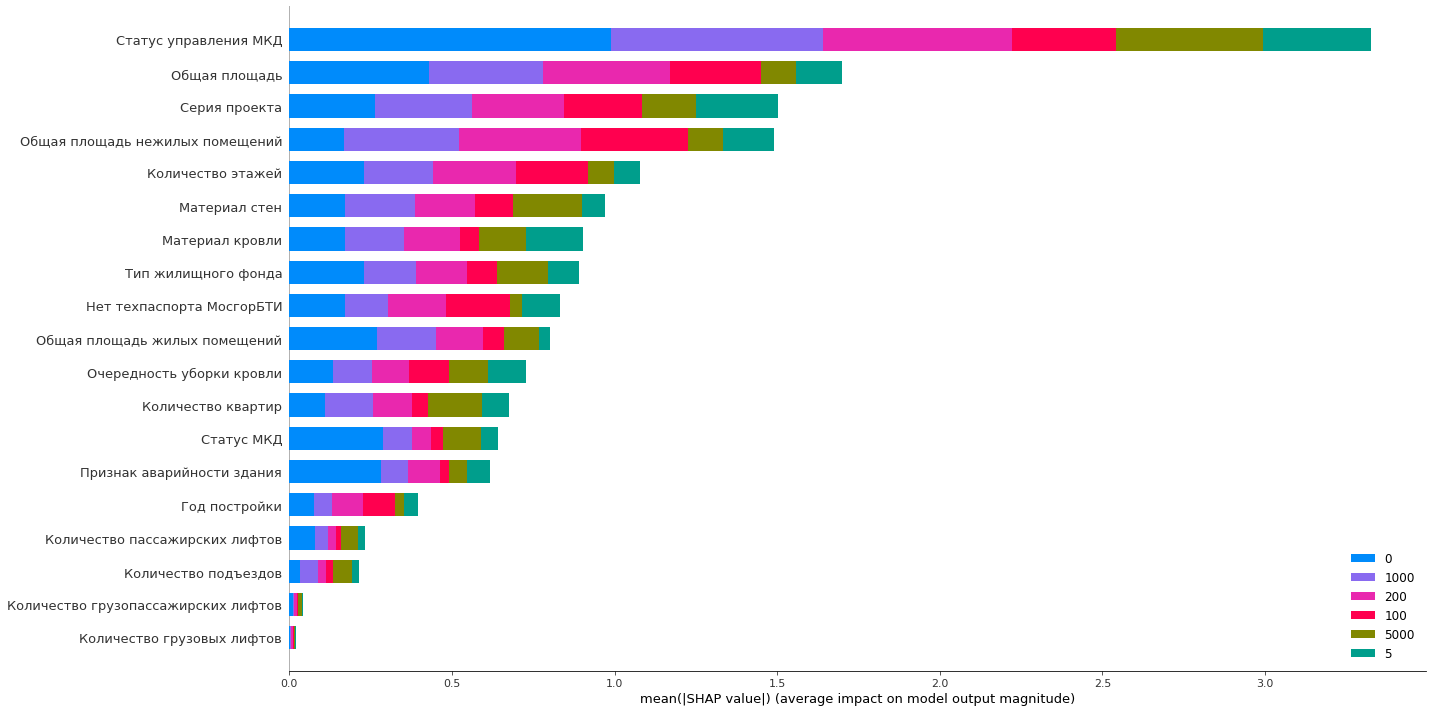

In [100]:
import shap
shap.initjs()

explainer = shap.TreeExplainer(model)
shap_values=explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_size=(20,10), class_names=model.classes_)

In [274]:
objects.sample(1)

,Адрес,Нет техпаспорта МосгорБТИ,Год постройки,Серия проекта,Количество этажей,Количество подъездов,Количество квартир,Общая площадь,Общая площадь жилых помещений,Общая площадь нежилых помещений,...,Признак аварийности здания,Количество пассажирских лифтов,Количество грузопассажирских лифтов,Очередность уборки кровли,Материал кровли,Тип жилищного фонда,Статус МКД,Статус управления МКД,Количество грузовых лифтов,inc_count
UNOM,,,,,,,,,,,,,,,,,,,,,
80016,"Дом по адресу Новокосинская ул., д.17, к.2",False,1996.0,2048757,17.0,2.0,135.0,8697.0,8644.0,53.0,...,22728486,2.0,2.0,0,22289201,42875644,58761330,45063584,0.0,239.0


In [167]:
cap_repair = pd.read_excel('3_Работы по капитальному ремонту, проведенные в многоквартирных домах.xlsx', sheet_name='Лист3')

In [152]:
# cap_repair.set_index('UNOM', inplace=True)

In [147]:
# cap_repair.drop('global_id', inplace=True, axis=1)

In [149]:
# cap_repair.drop_duplicates(subset=['UNOM', ], inplace=True)

In [153]:
rep_set = set(cap_repair.groupby('UNOM').count().index)
inc_set = set(objects.query('inc_count != 0').index)
rep_set <= inc_set

True

In [164]:
# cap_repair.set_index('WORK_NAME', inplace=True)

In [239]:
cap_repair_dist = cap_repair.groupby('WORK_NAME')['UNOM'].apply(list).reset_index(name='unoms')
cap_repair_dist['unoms_count'] = cap_repair_dist.unoms.apply(len)
cap_repair_dist.sort_values('unoms_count', ascending=False)

,WORK_NAME,unoms,unoms_count
0,замена лифтового оборудования,"[20151, 20151, 8576, 21908, 21910, 10012, 1815...",285
15,"ремонт подвальных помещений, относящихся к общ...","[11466, 2328, 11723, 7376, 28391, 22830, 365, ...",188
8,ремонт внутридомовых инженерных систем теплосн...,"[11466, 7376, 28391, 11723, 22830, 365, 11079,...",175
10,ремонт внутридомовых инженерных систем холодно...,"[11466, 11723, 7376, 28391, 22830, 365, 11079,...",161
18,ремонт фасадов,"[11723, 7376, 365, 11079, 14953, 19179, 8652, ...",156
3,ремонт внутридомовых инженерных систем водоотв...,"[11466, 11723, 7376, 28391, 22830, 365, 11079,...",145
13,ремонт крыши,"[11723, 7376, 365, 11079, 5945, 14953, 19179, ...",143
6,ремонт внутридомовых инженерных систем горячег...,"[11466, 11723, 7376, 28391, 22830, 365, 11079,...",134
12,ремонт внутридомовых инженерных систем электро...,"[28391, 22830, 365, 11079, 18531, 1262, 1264, ...",59
11,ремонт внутридомовых инженерных систем холодно...,"[365, 14953, 24749, 30166, 30162, 30169, 18508...",55


In [271]:
work_unoms = set(cap_repair_dist.iloc[1,1])

In [234]:
incidents.set_index('unom').loc[[14953, 18508, 24239]]

,Наименование,Источник,Дата создания во внешней системе,Дата закрытия,Округ,Адрес,Дата и время завершения события во
unom,,,,,,,
14953,Повреждение инженерных сетей,EDC,2022-02-08 15:45:27.000000,2022-02-08 16:11:28.372000,ВАО,внутригородская территория муниципальный округ...,2022-02-08 16:00:37.000000
14953,Повреждение инженерных сетей,EDC,2022-02-02 23:27:35.000000,2022-02-03 02:45:07.162000,ВАО,внутригородская территория муниципальный округ...,2022-02-03 00:36:34.000000
14953,Аварийная протечка в подъезде,EDC,2022-01-25 06:53:38.000000,2022-01-25 07:41:27.346000,ВАО,внутригородская территория муниципальный округ...,2022-01-25 06:56:30.000000
14953,Повреждение инженерных сетей,EDC,2022-01-25 08:26:32.000000,2022-01-25 08:59:23.128000,ВАО,внутригородская территория муниципальный округ...,2022-01-25 08:29:06.000000
14953,Отсутствие ХВС в доме,EDC,2022-01-02 19:33:25.000000,2022-01-02 20:34:23.151000,ВАО,внутригородская территория муниципальный округ...,2022-01-02 20:07:24.000000
...,...,...,...,...,...,...,...
24239,Отсутствуют актуальные мгновенные значения,ASUPR,2022-11-08 20:53:37.000000,2022-11-08 20:53:52.245000,ВАО,внутригородская территория муниципальный округ...,NaN
24239,Отсутствуют актуальные мгновенные значения,ASUPR,2022-11-09 02:53:50.000000,2022-11-09 02:54:07.448000,ВАО,внутригородская территория муниципальный округ...,NaN
24239,Отсутствуют актуальные мгновенные значения,ASUPR,2022-11-09 02:53:50.000000,2022-11-09 02:54:07.610000,ВАО,внутригородская территория муниципальный округ...,NaN


In [272]:
pd.get_dummies(incidents.set_index('unom').query('Источник != "ASUPR"').loc[work_unoms]['Наименование']).mean().sort_values(ascending=False)

C:\Users\Андрей\AppData\Local\Temp\ipykernel_1084\2498274387.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  pd.get_dummies(incidents.set_index('unom').query('Источник != "ASUPR"').loc[work_unoms]['Наименование']).mean().sort_values(ascending=False)


Температура в квартире ниже нормативной                                       0.134207
Отсутствие освещения в местах общего пользования                              0.105178
Лифт требует ремонта                                                          0.089796
Отсутствие ГВС в доме                                                         0.078098
Отсутствие ХВС в доме                                                         0.074848
Загрязнение/замусоренность подъезда                                           0.067699
Недогрев ГВС                                                                  0.047660
Повреждение элементов входной двери                                           0.042353
Засор мусоропровода                                                           0.033687
Повреждение системы электропроводки/щитового оборудования                     0.033471
Неисправность запирающего устройства                                          0.023505
Засор канализации                          

In [210]:
cap_repair_dist.loc[:,'WORK_NAME']

pandas.core.series.Series

In [224]:
work_inc_cross = pd.DataFrame(cap_repair_dist['WORK_NAME']).join(cap_repair_dist.apply(lambda row: pd.get_dummies(incidents.set_index('unom').query('Источник != "ASUPR"').loc[row.unoms]['Наименование']).sum(), axis=1))

In [225]:
work_inc_cross

,WORK_NAME,Аварийная протечка в подъезде,Аварийная протечка с кровли,Аварийная протечка труб в подъезде,Аварийное повреждение лестницы,Блокировка входной двери,Взрыв,Вибрирует газовая труба,Гул (шум) на объекте АО МОСГАЗ; Запах газа на улице,"Гул (шум, вибрация) от газопровода",...,Температура в помещении общего пользования ниже нормативной,Течь в системе отопления,Угроза взрыва,"Утечка воды из земли, поступает на проезжую часть","Утечка воды из земли, прочее","Утечка воды из колодца, поступает на проезжую часть","Утечка воды из колодца, прочее","Утечка воды из-под асфальта, прочее","Утечка воды, прочее",Хлопок газа
0,замена лифтового оборудования,276.0,211.0,NaN,117.0,94.0,1.0,NaN,NaN,NaN,...,26.0,19.0,3.0,22.0,48.0,NaN,NaN,NaN,NaN,NaN
1,"замена оконных блоков, расположенных в помещен...",59.0,127.0,1.0,12.0,25.0,NaN,NaN,NaN,NaN,...,5.0,9.0,3.0,NaN,NaN,2.0,10.0,2.0,NaN,NaN
2,ремонт внутреннего водостока,30.0,38.0,NaN,7.0,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN
3,ремонт внутридомовых инженерных систем водоотв...,187.0,317.0,1.0,44.0,60.0,1.0,NaN,1.0,2.0,...,30.0,26.0,5.0,NaN,6.0,2.0,15.0,2.0,NaN,1.0
4,ремонт внутридомовых инженерных систем водоотв...,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,ремонт внутридомовых инженерных систем газосна...,8.0,14.0,NaN,5.0,8.0,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN
6,ремонт внутридомовых инженерных систем горячег...,204.0,309.0,1.0,43.0,67.0,1.0,NaN,1.0,2.0,...,30.0,21.0,5.0,NaN,2.0,2.0,15.0,2.0,NaN,NaN
7,ремонт внутридомовых инженерных систем горячег...,104.0,102.0,NaN,16.0,24.0,NaN,NaN,NaN,NaN,...,5.0,13.0,NaN,NaN,6.0,NaN,3.0,NaN,NaN,NaN
8,ремонт внутридомовых инженерных систем теплосн...,214.0,367.0,1.0,51.0,80.0,1.0,NaN,1.0,2.0,...,32.0,22.0,5.0,NaN,6.0,2.0,15.0,2.0,NaN,1.0
9,ремонт внутридомовых инженерных систем теплосн...,19.0,26.0,NaN,8.0,10.0,NaN,NaN,NaN,NaN,...,5.0,4.0,NaN,NaN,4.0,NaN,2.0,NaN,NaN,NaN


In [126]:
cap_repair.head(3).merge(incidents.groupby(['unom', 'Наименование'])['Источник'].count(),
                        how='left', left_index=True, right_on='unom')

global_id  PERIOD  \
unom  Наименование                                                            
20151 Аварийная протечка с кровли                            351060    2022   
      Загрязнение воды                                       351060    2022   
      Загрязнение/замусоренность подъезда                    351060    2022   
      Запах газа в доме                                      351060    2022   
      Запах газа в кухне                                     351060    2022   
      Запах газа в подъезде и на улице                       351060    2022   
      Засоры, засор на дворовой сети                         351060    2022   
      Изменение конфигурации УСПД                            351060    2022   
      Качество воды - ржавая вода                            351060    2022   
      Критичное отклонение температуры ГВС ниже нормы...     351060    2022   
      Критичное отклонение температуры ГВС ниже нормы...     351060    2022   
      Лифт требует ремонта                                   351060    2022   
      Наличие крыс/мышей/насекомых в местах общего по...     351060    2022   
      Недогрев ГВС                                           351060    2022   
      Нет связи с ПУ                                         351060    2022   
      Нет связи с УСПД                                       351060    2022   
      Неудовлетворительное техническое содержание мус...     351060    2022   
      Низкий уровень сигнала GSM                             351060    2022   
      Отклонение ГВС ниже нормы днем (мониторинг)            351060    2022   
      Отклонение ГВС ниже нормы ночью (мониторинг)           351060    2022   
      Открыт колодец                                         351060    2022   
      Открыт колодец на газоне                               351060    2022   
      Открыт шкаф УСПД                                       351060    2022   
      Отрицательные интегральные значения                    351060    2022   
      Отсутствие ГВС в доме                                  351060    2022   
      Отсутствие отопления в доме                            351060    2022   
      Отсутствует циркуляция ГВС                             351060    2022   
      Отсутствуют актуальные мгновенные значения             351060    2022   
      Отсутствуют актуальные суточные значения               351060    2022   
      Повреждение внутренней двери                           351060    2022   
      Повреждение системы электропроводки/щитового об...     351060    2022   
      Поломка лифта                                          351060    2022   
      Поломка освещения перед подъездом                      351060    2022   
      Поломка почтовых ящиков                                351060    2022   
      Расхождение времени ПУ                                 351060    2022   
      Температура ГВС ниже нормы                             351060    2022   
      Аварийная протечка с кровли                            430496    2022   
      Загрязнение воды                                       430496    2022   
      Загрязнение/замусоренность подъезда                    430496    2022   
      Запах газа в доме                                      430496    2022   
      Запах газа в кухне                                     430496    2022   
      Запах газа в подъезде и на улице                       430496    2022   
      Засоры, засор на дворовой сети                         430496    2022   
      Изменение конфигурации УСПД                            430496    2022   
      Качество воды - ржавая вода                            430496    2022   
      Критичное отклонение температуры ГВС ниже нормы...     430496    2022   
      Критичное отклонение температуры ГВС ниже нормы...     430496    2022   
      Лифт требует ремонта                                   430496    2022   
      Наличие крыс/мышей/насекомых в местах общего по...     430496    2022   
      Недогрев ГВС           

In [109]:
cap_repair.groupby(['UNOM', 'WORK_NAME']).first().head(100)

global_id  PERIOD  \
UNOM WORK_NAME                                                               
365  ремонт внутридомовых инженерных систем водоотве...     430983    2022   
     ремонт внутридомовых инженерных систем горячего...     347422    2022   
     ремонт внутридомовых инженерных систем горячего...     430985    2022   
     ремонт внутридомовых инженерных систем теплосна...     430986    2022   
     ремонт внутридомовых инженерных систем теплосна...     430987    2022   
     ремонт внутридомовых инженерных систем холодног...     347421    2022   
     ремонт внутридомовых инженерных систем холодног...     430988    2022   
     ремонт внутридомовых инженерных систем электрос...     347420    2022   
     ремонт крыши                                           430990    2022   
     ремонт мусоропровода                                   430989    2022   
     ремонт подвальных помещений, относящихся к обще...     347423    2022   
     ремонт пожарного водопровода                           430991    2022   
     ремонт фасадов                                         347425    2022   
367  ремонт внутридомовых инженерных систем водоотве...     430732    2022   
     ремонт внутридомовых инженерных систем горячего...     430734    2022   
     ремонт внутридомовых инженерных систем горячего...     430735    2022   
     ремонт внутридомовых инженерных систем теплосна...     430736    2022   
     ремонт внутридомовых инженерных систем теплосна...     430737    2022   
     ремонт внутридомовых инженерных систем холодног...     346283    2022   
     ремонт внутридомовых инженерных систем холодног...     430738    2022   
     ремонт внутридомовых инженерных систем электрос...     346282    2022   
     ремонт крыши                                           430740    2022   
     ремонт мусоропровода                                   430739    2022   
     ремонт подвальных помещений, относящихся к обще...     346284    2022   
     ремонт фасадов                                         346286    2022   
370  ремонт внутридомовых инженерных систем теплосна...     347064    2022   
376  ремонт внутреннего водостока                           389737    2022   
     ремонт внутридомовых инженерных систем водоотве...     389735    2022   
     ремонт внутридомовых инженерных систем горячего...     389734    2022   
     ремонт внутридомовых инженерных систем теплосна...     389736    2022   
     ремонт внутридомовых инженерных систем холодног...     389733    2022   
     ремонт крыши                                           389732    2022   
     ремонт подвальных помещений, относящихся к обще...     356540    2022   
     ремонт фасадов                                         389731    2022   
379  ремонт крыши                                           395064    2022   
382  ремонт внутреннего водостока                           431193    2022   
     ремонт внутридомовых инженерных систем водоотве...     431190    2022   
     ремонт внутридомовых инженерных систем горячего...     431191    2022   
     ремонт внутридомовых инженерных систем теплосна...     346545    2022   
     ремонт внутридомовых инженерных систем холодног...     431192    2022   
     ремонт крыши                                           346546    2022   
     ремонт подвальных помещений, относящихся к обще...     346547    2022   
     ремонт фасадов                                         346548    2022   
388  ремонт крыши                                           385144    2022   
     ремонт фасадов                                         385145    2022   
462  ремонт внутридомовых инженерных систем водоотве...     366345    2022   
     ремонт внутридомовых инженерных систем теплосна...     366346    2022   
     ремонт внутридомовых инженерных систем холодног...     366344    2022   
     ремонт подвальных помещений, относящихся к обще...     366347    2022   
1260 ремонт внутридомовых инженерных систем водоотве...     395996    2022   
 

In [47]:
pd.options.display.max_rows = 400
# incidents.groupby(['Источник', 'Наименование'])['unom'].count().sort_values(ascending=False)
incidents.groupby(['Наименование'])['unom'].count().sort_values(ascending=False)

Наименование
Отсутствуют актуальные мгновенные значения                                    138283
Температура в квартире ниже нормативной                                        95886
Отсутствие освещения в местах общего пользования                               66044
Отсутствуют актуальные суточные значения                                       46837
Нет питания УСПД                                                               42108
Нет связи с ПУ                                                                 40904
Низкий уровень сигнала GSM                                                     38243
Лифт требует ремонта                                                           37784
Температура ГВС ниже нормы                                                     37334
Отсутствие ГВС в доме                                                          35690
Загрязнение/замусоренность подъезда                                            34324
Отсутствует циркуляция ГВС                          

In [294]:
objects.query('inc_count != 0').sample(1).apply(lambda row:pd.get_dummies(incidents.set_index('unom').loc[row.name]['Наименование']).sum(), axis=1)

,T1 < min,T1 > max,Загрязнение воды,Загрязнение/замусоренность подъезда,Запах газа на улице и в подъезде,Изменение конфигурации УСПД,Критичное отклонение температуры ГВС ниже нормы днем (мониторинг),Критичное отклонение температуры ГВС ниже нормы ночью (мониторинг),Недогрев ГВС,Неочищенная кровля,...,Отсутствие отопления в доме,Отсутствует циркуляция ГВС,Отсутствуют актуальные мгновенные значения,Отсутствуют актуальные суточные значения,Повреждение системы электропроводки/щитового оборудования,Повреждение элементов входной двери,Разбито/сломано/повреждено окно в местах общего пользования,Расхождение времени ПУ,Температура ГВС ниже нормы,Температура в квартире ниже нормативной
UNOM,,,,,,,,,,,,,,,,,,,,,
5937,2,4,3,6,1,6,1,1,6,1,...,1,3,10,7,1,8,5,1,3,9


In [295]:
objects.loc[5937]

Адрес                                  Дом по адресу Гражданская 4-я ул., д.39, к.6
Нет техпаспорта МосгорБТИ                                                     False
Год постройки                                                                1963.0
Серия проекта                                                               2048912
Количество этажей                                                               5.0
Количество подъездов                                                            3.0
Количество квартир                                                             60.0
Общая площадь                                                                2519.0
Общая площадь жилых помещений                                                2496.0
Общая площадь нежилых помещений                                                23.0
Материал стен                                                             179625102
Признак аварийности здания                                                 2

In [296]:
incidents.set_index('unom').loc[5937]['Наименование'].value_counts()

Низкий уровень сигнала GSM                                            10
Отсутствуют актуальные мгновенные значения                            10
Температура в квартире ниже нормативной                                9
Повреждение элементов входной двери                                    8
Отсутствуют актуальные суточные значения                               7
Изменение конфигурации УСПД                                            6
Загрязнение/замусоренность подъезда                                    6
Недогрев ГВС                                                           6
Разбито/сломано/повреждено окно в местах общего пользования            5
T1 > max                                                               4
Температура ГВС ниже нормы                                             3
Отсутствует циркуляция ГВС                                             3
Загрязнение воды                                                       3
Отсутствие ГВС в доме                              

In [321]:
objects_inc = objects.query('inc_count > 1')
# objects_inc_dummies = objects_inc.apply(lambda row:pd.get_dummies(incidents.set_index('unom').loc[row.name]['Наименование']).sum(), axis=1)
# sample = objects_inc.sample(1)
# sample.apply(lambda row:incidents.set_index('unom').loc[row.name,'Наименование'].value_counts(), axis=1)
objects_inc_dummies = objects_inc.apply(lambda row:incidents.set_index('unom').loc[row.name,'Наименование'].value_counts(), axis=1)

In [338]:
set(incidents['Наименование'].unique()) - set(objects_inc_dummies.columns)

{nan,
 'Восстановление трубопровода, санация',
 'Занижен колодец',
 'Запах газа в котельной',
 'Запах газа в частном доме',
 'Запах газа в частном доме; Запах газа от газового оборудования',
 'Запах газа от колодца',
 'Нарушение в работе АОГВ',
 'Нарушение подачи воды, нет воды в ЦТП',
 'Не работает колонка.',
 'Перекрытие полос',
 'Проверить подпор, отключить ГРП № Вешняки, кв.79.',
 'Просадка асфальта( колодец)',
 'Разрушение асвальта вокруг колодца',
 'Установить дежурство на ГРП № Вешняки кв. 76'}

In [339]:
incidents.query('Наименование == "Установить дежурство на ГРП № Вешняки кв. 76"')

,Наименование,Источник,Дата создания во внешней системе,Дата закрытия,Округ,Адрес,unom,Дата и время завершения события во
256485,Установить дежурство на ГРП № Вешняки кв. 76,MOS_GAS,2022-11-18 12:49:25.000000,2022-11-18 13:13:31.543000,ВАО,внутригородская территория муниципальный округ...,2502632,2022-11-18 13:13:31.276000


In [354]:
objects_inc_dummies[incident_index_top100].fillna(0)

,Температура в квартире ниже нормативной,Отсутствие освещения в местах общего пользования,Лифт требует ремонта,Отсутствие ГВС в доме,Загрязнение/замусоренность подъезда,Повреждение элементов входной двери,Недогрев ГВС,Засор мусоропровода,Повреждение системы электропроводки/щитового оборудования,Отсутствие ХВС в доме,...,Взрыв,"Нарушение подачи воды, слабое давление","Колодцы, люк сдвинут","Колодцы, нет люка и крышки",Повреждение асфальтобетонного покрытия,Запах газа из закрытой квартиры,Запах гари в квартире/подъезде,Запах газа в холле,"Утечка воды, прочее","Утечка воды из колодца, поступает на проезжую часть"
UNOM,,,,,,,,,,,,,,,,,,,,,
64148,49.0,71.0,27.0,22.0,11.0,7.0,5.0,16.0,3.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19485,13.0,3.0,0.0,1.0,12.0,2.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18533,7.0,0.0,0.0,5.0,2.0,1.0,10.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22830,14.0,41.0,55.0,37.0,19.0,17.0,14.0,9.0,34.0,28.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12331,23.0,5.0,0.0,5.0,3.0,4.0,1.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5277801,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5283529,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5245216,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [349]:
incident_index_top100 = incidents.query('Источник != "ASUPR"')['Наименование'].value_counts()[:100].index

In [356]:
data = objects_inc.join(objects_inc_dummies[incident_index_top100].fillna(0), how='inner')

In [371]:
cap_repair2 = pd.read_excel('3_Работы по капитальному ремонту, проведенные в многоквартирных домах.xlsx', sheet_name='Лист3')

In [373]:
data['target'] = cap_repair2.set_index('UNOM')['WORK_NAME'].groupby(level=0).apply(list)
# data.target.fillna([], inplace=True)

In [374]:
data

,Адрес,Нет техпаспорта МосгорБТИ,Год постройки,Серия проекта,Количество этажей,Количество подъездов,Количество квартир,Общая площадь,Общая площадь жилых помещений,Общая площадь нежилых помещений,...,"Нарушение подачи воды, слабое давление","Колодцы, люк сдвинут","Колодцы, нет люка и крышки",Повреждение асфальтобетонного покрытия,Запах газа из закрытой квартиры,Запах гари в квартире/подъезде,Запах газа в холле,"Утечка воды, прочее","Утечка воды из колодца, поступает на проезжую часть",target
UNOM,,,,,,,,,,,,,,,,,,,,,
64148,"Дом по адресу Байкальская ул., д.18, к.2",False,2005.0,2048798,18.0,2.0,148.0,8266.0,8220.0,46.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
19485,"Дом по адресу Перовская ул., д.48",False,1955.0,2048912,4.0,2.0,20.0,1240.0,1070.0,170.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
18533,"Дом по адресу Парковая 3-я ул., д.39, к.3",False,1960.0,2048912,5.0,3.0,60.0,2518.0,2492.0,26.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
22830,"Дом по адресу Свободный просп., д.11, к.2",False,1973.0,2048755,9.0,12.0,431.0,21103.0,21088.0,15.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,[ремонт внутридомовых инженерных систем электр...
12331,"Дом по адресу Кусковская ул., д.23, к.1",False,1968.0,2048912,5.0,4.0,64.0,4133.0,2697.0,1436.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5277801,"Дом по адресу Амурская ул., д.1А, к.5",False,NaN,2048743,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
5283529,"Дом по адресу Черное Озеро ул., д.4",True,NaN,2048743,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
5245216,"Дом по адресу Тюменский пр., д.3, к.1",True,NaN,2048743,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [384]:
# objects_v = objects.drop(val)
y = data.target.values
X = data.drop(['Адрес', 'inc_count'], axis=1)
# X.fillna(0, inplace=True)
# X.replace(0, np.nan, inplace=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [393]:
X_train

,Нет техпаспорта МосгорБТИ,Год постройки,Серия проекта,Количество этажей,Количество подъездов,Количество квартир,Общая площадь,Общая площадь жилых помещений,Общая площадь нежилых помещений,Материал стен,...,"Нарушение подачи воды, слабое давление","Колодцы, люк сдвинут","Колодцы, нет люка и крышки",Повреждение асфальтобетонного покрытия,Запах газа из закрытой квартиры,Запах гари в квартире/подъезде,Запах газа в холле,"Утечка воды, прочее","Утечка воды из колодца, поступает на проезжую часть",target
UNOM,,,,,,,,,,,,,,,,,,,,,
2257,False,1960.0,2048798,5.0,4.0,80.0,3373.0,3367.0,6.0,179625102,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
13464,False,1927.0,2048798,2.0,3.0,3.0,208.0,208.0,0.0,2048931,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
18983,False,1963.0,2048751,5.0,4.0,80.0,3455.0,3414.0,41.0,179625102,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
18783,False,1959.0,2048912,5.0,3.0,60.0,2504.0,2465.0,39.0,179625102,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
16484,False,1990.0,2048777,17.0,7.0,463.0,27653.0,25434.0,2219.0,2048929,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2403793,False,1983.0,2048798,1.0,NaN,NaN,274.0,0.0,274.0,2048929,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
19200,False,1969.0,2048763,9.0,2.0,64.0,3488.0,2801.0,687.0,179625102,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
15122,False,1973.0,2048781,9.0,4.0,142.0,7081.0,7067.0,14.0,2048929,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [392]:
from catboost import CatBoostClassifier, Pool
from catboost.utils import eval_metric

train_pool = Pool(X_train, y_train, cat_features=cat_col, text_features=None, embedding_features=None)
test_pool = Pool(X_test, y_test, cat_features=cat_col, text_features=None, embedding_features=None)
# model = CatBoostClassifier(eval_metric='F1', learning_rate=0.1, iterations=2000)
model = CatBoostClassifier(loss_function='MultiLogloss', learning_rate=0.1, iterations=2000, max_ctr_complexity=1)
model.fit(train_pool, eval_set=test_pool, use_best_model=True, early_stopping_rounds=5)

test_preds = model.predict(test_pool)
train_preds = model.predict(train_pool)

print("\nTest  F1 : %.5f"%eval_metric(y_test, test_preds, "F1")[0])
print("Train F1 : %.5f"%eval_metric(y_train, train_preds, "F1")[0])

CatBoostError: Invalid type for cat_feature[object_idx=1,feature_idx=13]=NaN : cat_features must be integer or string, real number values and NaN values should be converted to string.

In [387]:
data[cat_col]

,Нет техпаспорта МосгорБТИ,Серия проекта,Материал стен,Признак аварийности здания,Очередность уборки кровли,Материал кровли,Тип жилищного фонда,Статус МКД,Статус управления МКД
UNOM,,,,,,,,,
64148,False,2048798,179625111,22728486,NaN,22289201,42875644,58761330,45063584
19485,False,2048912,179625102,22728486,22289162,22289204,42875644,58761330,45063584
18533,False,2048912,179625102,22728486,22289162,22289201,42875644,58761330,45063584
22830,False,2048755,2048929,22728486,NaN,22289201,42875644,58761330,45063584
12331,False,2048912,179625102,22728486,22289163,22289201,42875644,58761330,45063584
...,...,...,...,...,...,...,...,...,...
5277801,False,2048743,101812168,22728487,NaN,22289209,42875644,58761330,45063584
5283529,True,2048743,101812168,22728487,NaN,22289209,42875644,58761330,45063584
5245216,True,2048743,101812168,22728487,NaN,22289209,42875644,58761330,45063584


#### ВСЁ ЗАНОВО

In [2]:
objects = (pd.read_excel('11_Многоквартирные дома с технико-экономическими характеристиками.xlsx', sheet_name='Sheet1', skiprows=1)
             .drop(['Адрес', 'ID', 'PARENT_ID', 'LOGIN', 'Форма собственности', 'Год реконструкции',
                    'Строительный объем', 'Износ объекта (по БТИ)', 'Класс энергоэффективности',
                    'Вид социального объекта', 'Причина Изменения Статуса МКД', 'Категория МКД', 'Кол-во обращений'],axis=1, errors='ignore'))
objects.set_index('UNOM', inplace=True)
objects['Нет техпаспорта МосгорБТИ'].replace('.ет.*БТИ', 'Нет техпаспорта МосгорБТИ', regex=True, inplace=True)
objects['Нет техпаспорта МосгорБТИ'].fillna(False, inplace=True)
objects['Серия проекта'].fillna(2048743, inplace=True)
objects['Материал стен'].fillna(101812168, inplace=True)
objects['Признак аварийности здания'].fillna(22728487, inplace=True)
objects['Материал кровли'].fillna(22289209, inplace=True)
objects.fillna(0, inplace=True)
objects['Нет техпаспорта МосгорБТИ'] = objects['Нет техпаспорта МосгорБТИ'].astype(bool)
objects=objects.astype(int)
objects = objects.astype({'Нет техпаспорта МосгорБТИ': 'category',
                          'Серия проекта': 'category',
                          'Материал стен': 'category',
                          'Признак аварийности здания': 'category',
                          'Очередность уборки кровли': 'category',
                          'Материал кровли': 'category',
                          'Тип жилищного фонда': 'category',
                          'Статус МКД': 'category',
                          'Статус управления МКД': 'category'})
obj_num_col = list(objects.select_dtypes(include=['int']).columns)
obj_cat_col = list(objects.select_dtypes(include=['category']).columns)

In [3]:
inc1 = pd.read_excel('2_new_Инциденты,_зарегистрированные_на_объектах_городского_хозяйства.xlsx', sheet_name='Result 1')
inc2 = pd.read_excel('2_new_Инциденты,_зарегистрированные_на_объектах_городского_хозяйства.xlsx', sheet_name='Result 2')

In [4]:
incidents = pd.concat([inc1, inc2], ignore_index=True)
incidents.dropna(subset=['Наименование'], inplace=True)

In [5]:
incident_index_top100 = list(incidents.query('Источник != "ASUPR"')['Наименование'].value_counts()[:100].index)

In [6]:
objects = (objects.merge(incidents.groupby('unom')['unom'].count(), how='left', left_index=True, right_index=True)
                  .rename({'unom': 'inc_count'}, axis=1))
objects.inc_count.fillna(0, inplace=True)

In [7]:
incidents.set_index('unom', inplace=True)

In [8]:
def inc_type_cnt(row):
    unom_incidents = incidents.loc[row.name, 'Наименование']
#     if not unom_incidents: return np.nan
    if isinstance(unom_incidents, str):
        unom_incidents = [unom_incidents]
    return pd.get_dummies(unom_incidents).sum()    

objects_inc = objects.query('inc_count != 0')
objects_inc_dummies = objects_inc.progress_apply(inc_type_cnt, axis=1)

100%|█████████████████████████████████████| 6677/6677 [00:35<00:00, 188.70it/s]


In [9]:
data = objects_inc.join(objects_inc_dummies[incident_index_top100].fillna(0), how='inner')

In [10]:
repair_works = pd.read_excel('3_Работы по капитальному ремонту, проведенные в многоквартирных домах.xlsx', sheet_name='Лист3')
data['target'] = repair_works.set_index('UNOM')['WORK_NAME'].groupby(level=0).apply(list)
# data.target.fillna({np.nan: []}, inplace=True)

In [11]:
class_names = list(repair_works.set_index('UNOM')['WORK_NAME'].unique())
class_names.append('Отсутствуют')
class_names_dict = {x[1]:x[0] for x in enumerate(class_names)}

In [205]:
# data2 = pd.concat([data.query('target==target'), data.query('target!=target').sample(373)])

In [248]:
def make_target_row(row):
    res = np.zeros(20, dtype=int)
    if not isinstance(row, list):
        res[-1] = 1
        return pd.Series(res)
    for repair_class in row:
        res[class_names_dict[repair_class]] = 1
    return pd.Series(res)

y = data.target.apply(make_target_row)
X = data[obj_num_col+obj_cat_col+incident_index_top100]
# X = data[obj_num_col+obj_cat_col]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [89]:
# from sklearn.datasets import make_multilabel_classification
# X, y = make_multilabel_classification(n_samples=500, n_features=20, n_classes=5, random_state=0)
# X_train, X_test, y_train, y_test = train_test_split(X, y)
# train_pool = Pool(X_train, y_train)
# test_pool = Pool(X_test, y_test)

In [249]:
from catboost import CatBoostClassifier, Pool
from catboost.utils import eval_metric

# train_pool = Pool(X_train, y_train, cat_features=obj_cat_col)
train_pool = Pool(X, y, cat_features=obj_cat_col)
# test_pool = Pool(X_test, y_test, cat_features=obj_cat_col)
model = CatBoostClassifier(loss_function='MultiLogloss',
                           eval_metric='HammingLoss',
                           class_names=class_names,
#                            class_names=['A', 'B', 'C', 'D', 'E'],
                           learning_rate=0.1,
                           iterations=300,
#                            max_ctr_complexity=1,
                          )
model.fit(train_pool,
#           eval_set=test_pool,
          metric_period=10,
          use_best_model=True,
#           early_stopping_rounds=5,
          plot=True,
          verbose=50)

# test_preds = model.predict(test_pool)
train_preds = model.predict(train_pool)

# print("\nTest  F1 : %.5f"%eval_metric(y_test, test_preds, "F1")[0])
# print("Train F1 : %.5f"%eval_metric(y_train, train_preds, "F1")[0])

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

You should provide test set for use best model. use_best_model parameter has been switched to false value.


0:	learn: 0.0144002	total: 1.84s	remaining: 9m 8s
50:	learn: 0.0136289	total: 1m 35s	remaining: 7m 45s
100:	learn: 0.0128725	total: 3m 15s	remaining: 6m 24s
150:	learn: 0.0104538	total: 5m 21s	remaining: 5m 17s
200:	learn: 0.0094653	total: 7m 34s	remaining: 3m 43s
250:	learn: 0.0084769	total: 9m 43s	remaining: 1m 53s
299:	learn: 0.0073087	total: 11m 48s	remaining: 0us


In [399]:
sample_row = data.query('target==target')[obj_num_col+obj_cat_col+incident_index_top100].sample(1)
display(sample_row)
display(model.predict(sample_row))
display(y.loc[sample_row.index[0]].values)

,Год постройки,Количество этажей,Количество подъездов,Количество квартир,Общая площадь,Общая площадь жилых помещений,Общая площадь нежилых помещений,Количество пассажирских лифтов,Количество грузопассажирских лифтов,Количество грузовых лифтов,...,Взрыв,"Нарушение подачи воды, слабое давление","Колодцы, люк сдвинут","Колодцы, нет люка и крышки",Повреждение асфальтобетонного покрытия,Запах гари в квартире/подъезде,Запах газа из закрытой квартиры,Запах газа в холле,"Утечка воды, прочее","Утечка воды из колодца, поступает на проезжую часть"
UNOM,,,,,,,,,,,,,,,,,,,,,
19210,1968,5,5,78,4300,3240,1060,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]])

array([0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [400]:
model.save_model('model.cbm')

In [32]:
sample_row.index[0]

13739

In [14]:
accuracy = eval_metric(y_test, test_preds, 'Accuracy')[0]
print(f'Accuracy: {accuracy}')

KeyError: 0

In [110]:
from sklearn.datasets import make_multilabel_classification
X, Y = make_multilabel_classification(n_samples=500, n_features=20, n_classes=5, random_state=0)

In [119]:
Y

array([[0, 0, 1, 1, 1],
       [0, 0, 1, 0, 0],
       [1, 1, 0, 1, 0],
       ...,
       [0, 0, 0, 0, 0],
       [1, 0, 0, 0, 1],
       [0, 1, 1, 0, 1]])

In [112]:
y_train

array([nan, nan, nan, ..., nan, nan, nan], dtype=object)

In [117]:
data.target.loc[22830]

['ремонт внутридомовых инженерных систем электроснабжения',
 'ремонт подвальных помещений, относящихся к общему имуществу в многоквартирном доме',
 'ремонт подъездов, направленный на восстановление их надлежащего состояния и проводимый при выполнении иных работ по капитальному ремонту общего имущества в многоквартирном доме',
 'ремонт внутридомовых инженерных систем водоотведения (канализации) (выпуски и сборные трубопроводы)',
 'замена оконных блоков, расположенных в помещениях общего пользования',
 'ремонт мусоропровода',
 'ремонт внутридомовых инженерных систем горячего водоснабжения (разводящие магистрали)',
 'ремонт внутридомовых инженерных систем теплоснабжения (разводящие магистрали)',
 'ремонт внутридомовых инженерных систем холодного водоснабжения (разводящие магистрали)']

#### ИНФЕРЕНС

In [ ]:
import pandas as pd
import numpy as np
from catboost import CatBoostClassifier

In [420]:
model_inf = CatBoostClassifier()
model_inf.load_model('model.cbm')

In [405]:
incident_index_top100

['Температура в квартире ниже нормативной',
 'Отсутствие освещения в местах общего пользования',
 'Лифт требует ремонта',
 'Отсутствие ГВС в доме',
 'Загрязнение/замусоренность подъезда',
 'Повреждение элементов входной двери',
 'Недогрев ГВС',
 'Засор мусоропровода',
 'Повреждение системы электропроводки/щитового оборудования',
 'Отсутствие ХВС в доме',
 'Засор канализации',
 'Протечка с кровли',
 'Аварийная протечка с кровли',
 'Неочищенная кровля',
 'Неисправность запирающего устройства',
 'Неудовлетворительное техническое содержание мусоропровода',
 'Повреждение инженерных сетей',
 'Наличие крыс/мышей/насекомых в местах общего пользования',
 'Повреждение отделочных покрытий пола/стены/ступеней/перил/других элементов',
 'Поломка лифта',
 'Повреждение внутренней двери',
 'Разбито/сломано/повреждено окно в местах общего пользования',
 'Повреждение элементов фасада',
 'Застревание в лифте',
 'Загрязнение воды',
 'Поломка освещения перед подъездом',
 'Загрязнение лифта',
 'Протечка в по

In [403]:
obj_num_col

['Год постройки',
 'Количество этажей',
 'Количество подъездов',
 'Количество квартир',
 'Общая площадь',
 'Общая площадь жилых помещений',
 'Общая площадь нежилых помещений',
 'Количество пассажирских лифтов',
 'Количество грузопассажирских лифтов',
 'Количество грузовых лифтов']

In [404]:
obj_cat_col

['Нет техпаспорта МосгорБТИ',
 'Серия проекта',
 'Материал стен',
 'Признак аварийности здания',
 'Очередность уборки кровли',
 'Материал кровли',
 'Тип жилищного фонда',
 'Статус МКД',
 'Статус управления МКД']

На вход модели подаётся датафрейм с колонками, указанными выше.
obj_num_col - это числовые характеристики объектов
obj_cat_col - это категориальные характеристики объектов
incident_index_top100 - это список 100 самых популярных видов обращений граждам.

In [409]:
data[obj_cat_col+obj_num_col+incident_index_top100].head(5)

,Нет техпаспорта МосгорБТИ,Серия проекта,Материал стен,Признак аварийности здания,Очередность уборки кровли,Материал кровли,Тип жилищного фонда,Статус МКД,Статус управления МКД,Год постройки,...,Взрыв,"Нарушение подачи воды, слабое давление","Колодцы, люк сдвинут","Колодцы, нет люка и крышки",Повреждение асфальтобетонного покрытия,Запах гари в квартире/подъезде,Запах газа из закрытой квартиры,Запах газа в холле,"Утечка воды, прочее","Утечка воды из колодца, поступает на проезжую часть"
UNOM,,,,,,,,,,,,,,,,,,,,,
64148,0,2048798,179625111,22728486,0,22289201,42875644,58761330,45063584,2005,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19485,0,2048912,179625102,22728486,22289162,22289204,42875644,58761330,45063584,1955,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18533,0,2048912,179625102,22728486,22289162,22289201,42875644,58761330,45063584,1960,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22830,0,2048755,2048929,22728486,0,22289201,42875644,58761330,45063584,1973,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12331,0,2048912,179625102,22728486,22289163,22289201,42875644,58761330,45063584,1968,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Ниже чтение датафрейма характеристик объектов из postgres и обработка. Нужно ещё приджойнить количество обращений по каждому объекту из списка incident_index_top100. Т.е. 100 колонок, каждая из которых называется как элемент списка (тип обращения) и посчитать количество. Я в SQL не соображу как это быстро сделать.

In [467]:
import sqlalchemy
creds = {
  "drivername": "postgresql+psycopg2",
  "username": "postgres",
  "password": "postgres1",
  "host": "84.201.161.167",
  "port": "5432",
  "database": "postgres"
}
engine = sqlalchemy.create_engine(sqlalchemy.engine.URL.create(**creds))
obj = pd.read_sql('''
SELECT col_754 as "Нет техпаспорта МосгорБТИ",
    col_758_id as "Серия проекта",
    col_769_id as "Материал стен",
    col_770_id as "Признак аварийности здания",
    col_775_id as "Очередность уборки кровли",
    col_781_id as "Материал кровли",
    col_2463_id as "Тип жилищного фонда",
    col_3163_id as "Статус МКД",
    col_3243_id as "Статус управления МКД",
    col_756 as "Год постройки",
    col_759 as "Количество этажей",
    col_760 as "Количество подъездов",
    col_761 as "Количество квартир",
    col_762 as "Общая площадь",
    col_763 as "Общая площадь жилых помещений",
    col_764 as "Общая площадь нежилых помещений",
    col_771 as "Количество пассажирских лифтов",
    col_772 as "Количество грузопассажирских лифтов",
    col_3363 as "Количество грузовых лифтов",
    col_782 as "UNOM"
FROM api_object
''', engine)
obj.rename(columns={'Количество грузопассажирских лиф':'Количество грузопассажирских лифтов'}, inplace=True)
obj.set_index('UNOM', inplace=True)
obj['Нет техпаспорта МосгорБТИ'].replace('.ет.*БТИ', 'Нет техпаспорта МосгорБТИ', regex=True, inplace=True)
obj['Нет техпаспорта МосгорБТИ'].fillna(False, inplace=True)
obj['Серия проекта'].fillna(2048743, inplace=True)
obj['Материал стен'].fillna(101812168, inplace=True)
obj['Признак аварийности здания'].fillna(22728487, inplace=True)
obj['Материал кровли'].fillna(22289209, inplace=True)
obj.fillna(0, inplace=True)
obj['Нет техпаспорта МосгорБТИ'] = objects['Нет техпаспорта МосгорБТИ'].astype(bool)
obj=obj.astype(int)
obj = obj.astype({'Нет техпаспорта МосгорБТИ': 'category',
                          'Серия проекта': 'category',
                          'Материал стен': 'category',
                          'Признак аварийности здания': 'category',
                          'Очередность уборки кровли': 'category',
                          'Материал кровли': 'category',
                          'Тип жилищного фонда': 'category',
                          'Статус МКД': 'category',
                          'Статус управления МКД': 'category'})
# obj_num_col2 = list(obj.select_dtypes(include=['int']).columns)
# obj_cat_col2 = list(obj.select_dtypes(include=['category']).columns)

Прогноз получаем после подачи датафрейма в model_inf.predict()

In [421]:
sample = data[obj_num_col+obj_cat_col+incident_index_top100].sample(5)
display(sample)
print('Прогноз')
display(model_inf.predict(sample))
print('Факт')
display(y.loc[sample.index].values)

,Год постройки,Количество этажей,Количество подъездов,Количество квартир,Общая площадь,Общая площадь жилых помещений,Общая площадь нежилых помещений,Количество пассажирских лифтов,Количество грузопассажирских лифтов,Количество грузовых лифтов,...,Взрыв,"Нарушение подачи воды, слабое давление","Колодцы, люк сдвинут","Колодцы, нет люка и крышки",Повреждение асфальтобетонного покрытия,Запах гари в квартире/подъезде,Запах газа из закрытой квартиры,Запах газа в холле,"Утечка воды, прочее","Утечка воды из колодца, поступает на проезжую часть"
UNOM,,,,,,,,,,,,,,,,,,,,,
2257,1960,5,4,80,3373,3367,6,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2122317,1972,3,0,0,2143,0,2143,0,0,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2502940,2005,3,0,0,4910,0,4910,2,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2400379,1962,3,0,0,8503,0,8503,0,3,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5065194,2017,32,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Прогноз


array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]])

Факт


array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]])

На выходе массив предсказаний, в котором позиция элемента соответствует тому или иному ремонту. Словарь соответствия ниже

In [423]:
class_names_dict

{'замена лифтового оборудования': 0,
 'ремонт внутридомовых инженерных систем водоотведения (канализации) (выпуски и сборные трубопроводы)': 1,
 'ремонт внутридомовых инженерных систем теплоснабжения (разводящие магистрали)': 2,
 'ремонт внутридомовых инженерных систем холодного водоснабжения (разводящие магистрали)': 3,
 'ремонт внутридомовых инженерных систем горячего водоснабжения (разводящие магистрали)': 4,
 'ремонт подвальных помещений, относящихся к общему имуществу в многоквартирном доме': 5,
 'ремонт внутридомовых инженерных систем газоснабжения': 6,
 'ремонт подъездов, направленный на восстановление их надлежащего состояния и проводимый при выполнении иных работ по капитальному ремонту общего имущества в многоквартирном доме': 7,
 'ремонт фасадов': 8,
 'ремонт крыши': 9,
 'ремонт внутридомовых инженерных систем электроснабжения': 10,
 'ремонт мусоропровода': 11,
 'замена оконных блоков, расположенных в помещениях общего пользования': 12,
 'ремонт внутридомовых инженерных сист